In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [6]:
data = pd.read_csv('opossum.csv')
print(data.shape)
data.head()


(104, 14)


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [7]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [8]:
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# data = imp_mean.fit_transform(data)

In [9]:
data['age']= data['age'].fillna(data['age'].mean())
data['footlgth']= data['footlgth'].fillna(data['footlgth'].mean())

In [10]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [11]:
from sklearn import preprocessing
 
le = preprocessing.LabelEncoder()
data.sex = le.fit_transform(data.sex)
data.Pop = le.fit_transform(data.Pop)
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


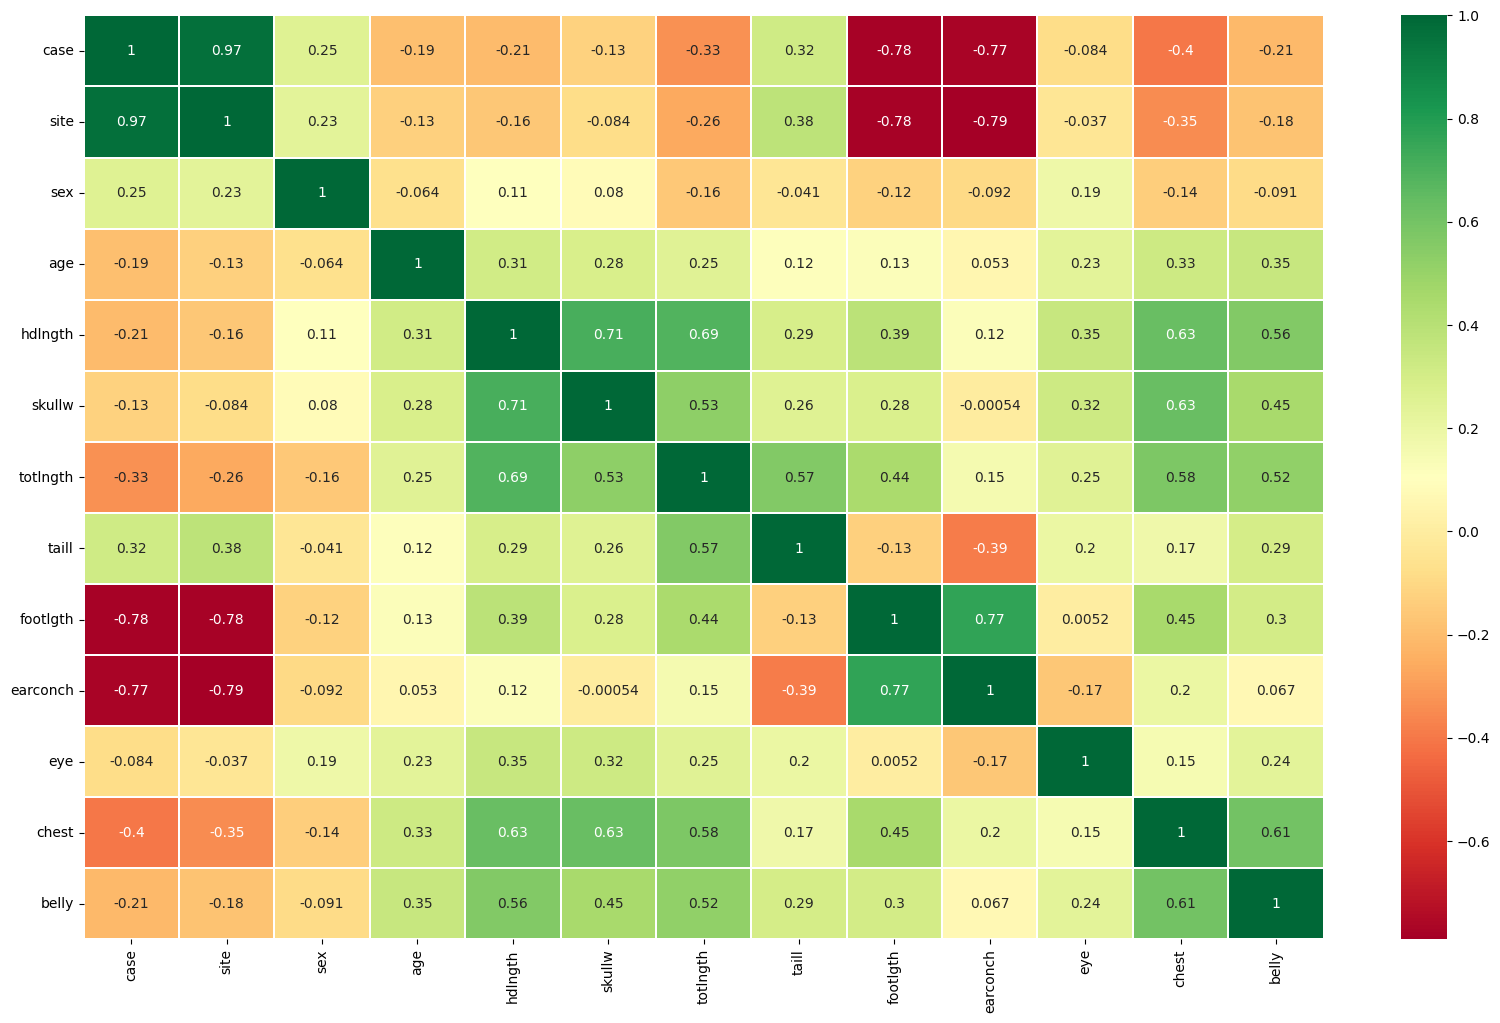

In [34]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [13]:
# data.pop('case')
# data.pop('site')
# data.pop('sex')
data.pop('Pop')

0      0
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    1
102    1
103    1
Name: Pop, Length: 104, dtype: int64

In [14]:
data.head()

,case,site,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [15]:
df_x= data.loc[:,data.columns != "age" ] #toute les colonnes excepté la colonne age 
df_y= data.age
#df_x1= data.loc[:,["Pop","sex"] ] selection par colonnes
df_x


,case,site,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,1,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,1,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


Splitation du jeu de données

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size= 0.17, random_state=42)
print('Test set:', x_train.shape)
print('Train set:', x_test.shape)

Test set: (86, 12)
Train set: (18, 12)


In [17]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1)
model.fit(x_train, y_train)
print('Train score', model.score(x_train, y_train))
print('Test score', model.score(x_test, y_test))

Train score 1.0
Test score 0.2184788611947478


Normalisation du jeu de données

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test= scaler.transform(x_test)
x_test= pd.DataFrame(x_test)

In [19]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test= scaler.transform(x_test)
x_test= pd.DataFrame(x_test)

<AxesSubplot: ylabel='Density'>

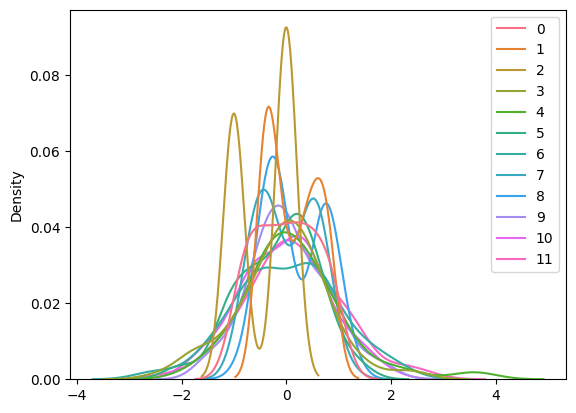

In [20]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_scaler = mms.fit_transform(x_train)
x_train_scaler = pd.DataFrame(x_train)

x_test_scaler = mms.fit_transform(x_test)
x_test_scaler = pd.DataFrame(x_test)
sns.kdeplot(x_train_scaler)

In [21]:
model.fit(x_train_scaler, y_train)
print('Train score', model.score(x_train_scaler, y_train))
print('Test score', model.score(x_test_scaler, y_test))

Train score 1.0
Test score 0.3146858130378235


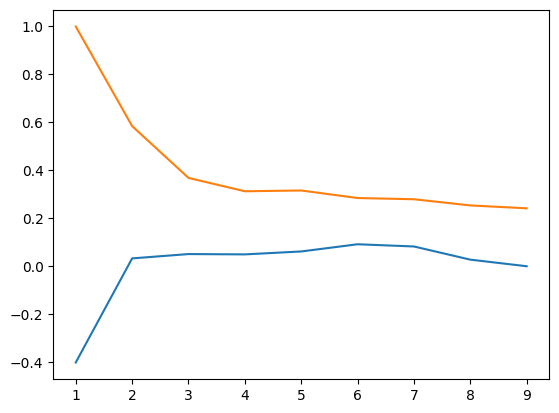

In [22]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import learning_curve, validation_curve
model = KNeighborsRegressor()
k = np.arange(1, 10)

train_score, val_score = validation_curve(model, x_train, y_train, param_name="n_neighbors", param_range=k, cv=2)
plt.plot(k, val_score.mean(axis=1))
plt.plot(k, train_score.mean(axis=1))

Cross validation + le meilleur nombre de voisin

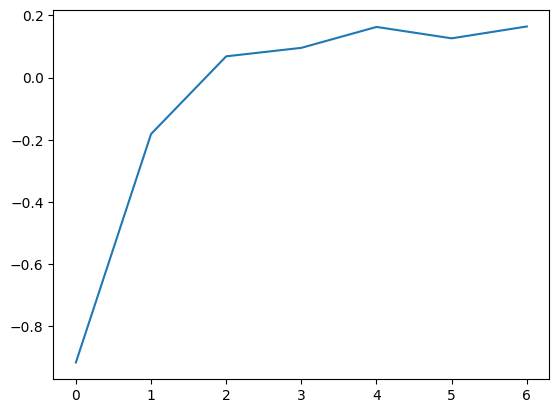

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
val_score = []
for k in range(1,8):
    score = cross_val_score(KNeighborsRegressor(k), x_train, y_train, cv=3).mean()
    val_score.append(score)
plt.plot(val_score);

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,20),
               'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [25]:
grid.best_score_

0.08562845979651472

In [26]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 8}

In [30]:
y_pred = model.fit(x_test, y_test)
y_pred = model.predict(x_test)
print(y_pred)

[3.2        3.4        4.4        5.6        2.56666667 4.6
 3.6        5.8        5.6        5.6        3.2        4.6
 4.4        3.96666667 2.56666667 5.4        3.8        2.8       ]


In [31]:
print(np.mean((y_test-y_pred)**2))

2.8811111111111116


In [32]:
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.6973836075298687


In [33]:
from sklearn.metrics import r2_score
R= r2_score(y_test, y_pred)
print(R)

0.4012848972901707
